# Loan Data Exploration
## by Lavish Lalwani

## Preliminary Wrangling

> This document explores a loan dataset containing 113,937 loans with 81 variables on each loan. It will focus the analysis on around 10 variables.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
# load in the dataset

loans = pd.read_csv('prosperLoanData.csv')

In [5]:
# get some basic info on the dataset

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
# let's have a look at some sample data to study the data a bit more

loans.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [8]:
# let's have a look at some stats

loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> There are 113,937 loans in the dataset with 81 features. Most variables are numeric or dates in nature, but some are texts like occupation and employment status.

### What is/are the main feature(s) of interest in your dataset?

> For this exploration, I will look into the borrower annual percentage rate (BorrowerAPR). I want to learn about what features in the dataset influences this rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I feel that the main determining factor of the borrower APR is the borrower's employment details. As such, I will look into EmploymentStatus, EmploymentStatusDuration, IncomeRange and IncomeVerifiable closely. I'll also expand my exploration to some other features like OpenCreditLines, CurrentCreditLines, CreditScoreRangeLower, CreditScoreRangeUpper, and LoanOriginalAmount.

## Univariate Exploration

> In this section, I'll look into the distributions of each individual features. Let's start with the most interesting employment related ones in this order: EmploymentStatus, EmploymentStatusDuration, IncomeRange and IncomeVerifiable.

In [19]:
# let's look at EmploymentStatus first

loans['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

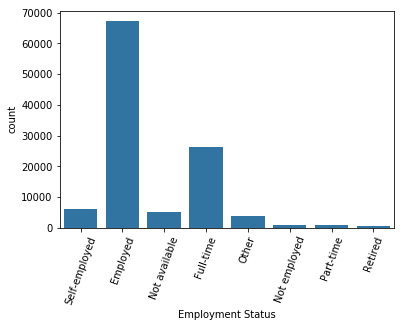

In [25]:
# let's plot EmploymentStatus data

default_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'EmploymentStatus', color = default_color);
plt.xlabel('Employment Status');
plt.xticks(rotation=70);

> This data is relatively unclear. For example, the status 'Employed' is very general and could very well be 'Full-time', 'Self-employed' or 'Part-time'. It also seems that most of the data falls within the 'Employed' status. The data is not ordered as there is no clear way to order it.

> I'll now move on to look at EmploymentStatusDuration.

In [27]:
# let's look at EmploymentStatusDuration

loans['EmploymentStatusDuration'].describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

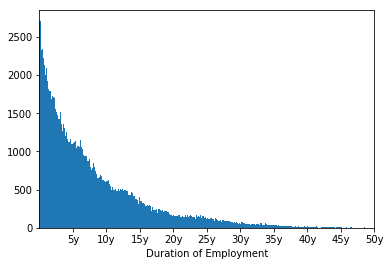

In [35]:
# let's plot EmploymentStatusDuration data

bin_size = 2
bins = np.arange(0, loans['EmploymentStatusDuration'].max()+bin_size, bin_size)

plt.hist(data = loans, x = 'EmploymentStatusDuration', bins = bins);
plt.xlabel('Duration of Employment');
plt.xlim(0, 600)
plt.xticks([60, 120, 180, 240, 300, 360, 420, 480, 540, 600],['5y', '10y', '15y', '20y', '25y', '30y', '35y', '40y', '45y', '50y'])
plt.show()


> Since there are lots of loans given to people who have been employed for less than 5 years. We'll take a closer look at that

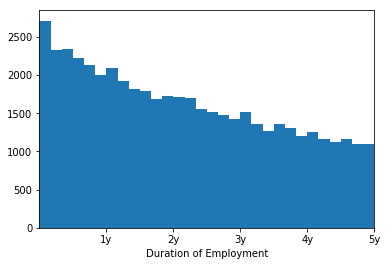

In [40]:
# zoom in to 0 - 5 years of employment

bin_size = 2
bins = np.arange(0, loans['EmploymentStatusDuration'].max()+bin_size, bin_size)

plt.hist(data = loans, x = 'EmploymentStatusDuration', bins = bins);
plt.xlabel('Duration of Employment');
plt.xlim(0, 60)
plt.xticks([12, 24, 36, 48, 60],['1y', '2y', '3y', '4y', '5y'])
plt.show()

> Strangely, there are a lot of loans given to people with 2 months or less employment duration. We'll check this.

In [45]:
# check people with employment duration of 0

data = loans[loans['EmploymentStatusDuration'] == 0]
data[['EmploymentStatus', 'EmploymentStatusDuration', 'IncomeRange', 'IncomeVerifiable']].head(5)

,EmploymentStatus,EmploymentStatusDuration,IncomeRange,IncomeVerifiable
51,Employed,0.0,"$50,000-74,999",True
161,Other,0.0,"$25,000-49,999",True
443,Full-time,0.0,"$25,000-49,999",True
532,Other,0.0,"$100,000+",True
556,Other,0.0,"$25,000-49,999",True


> Looking at the data above, it's a bit odd that there are people employed with a verified income but with the employment status duration as 0. We'll remove this outlier. 

In [47]:
# remove loans data with employment status duration as 0 and check

loans = loans[loans['EmploymentStatusDuration'] != 0]

assert len(loans[loans['EmploymentStatusDuration'] == 0]) == 0

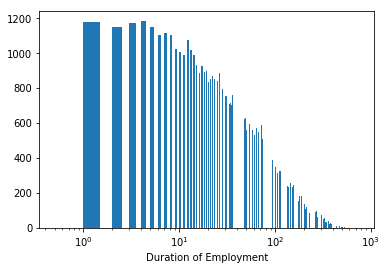

In [76]:
# try replotting the distribution

bin_size = 0.5
bins = np.arange(0, loans['EmploymentStatusDuration'].max()+bin_size, bin_size)

plt.hist(data = loans, x = 'EmploymentStatusDuration', bins = bins);
plt.xlabel('Duration of Employment');
plt.xscale('log')
#plt.xlim(0, 600)
#plt.xticks([60, 120, 180, 240, 300, 360, 420, 480, 540, 600],['5y', '10y', '15y', '20y', '25y', '30y', '35y', '40y', '45y', '50y'])
plt.show()

> There are still a lot of people with short employment duration.

> We'll move on to IncomeRange.

In [49]:
# let's look at IncomeRange data

loans['IncomeRange'].value_counts()

$25,000-49,999    31615
$50,000-74,999    30698
$100,000+         17237
$75,000-99,999    16784
Not displayed      7732
$1-24,999          6981
Not employed        761
$0                  595
Name: IncomeRange, dtype: int64

In [55]:
# let's order this data appropriately

order = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not displayed', 'Not employed']
ordered_income = pd.api.types.CategoricalDtype(ordered = True, categories = order)
loans['IncomeRange'] = loans['IncomeRange'].astype(ordered_income)

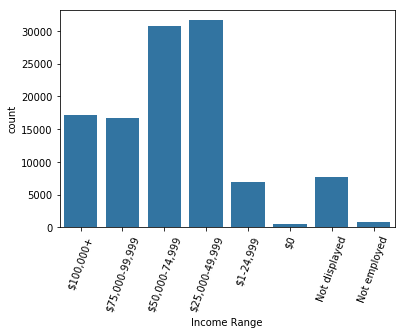

In [57]:
# let's plot IncomeRange data

default_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'IncomeRange', color = default_color);
plt.xlabel('Income Range');
plt.xticks(rotation=70);

> Looking at income data, it seems the majority of users fall between 25k to 75k dollars. Strangely, there are some people earning 0 dollars. We will check this.  

In [59]:
# check people earning $0

data = loans[loans['IncomeRange'] == '$0']
data[['EmploymentStatus', 'EmploymentStatusDuration', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome']].head(5)

,EmploymentStatus,EmploymentStatusDuration,IncomeRange,IncomeVerifiable,StatedMonthlyIncome
78,Full-time,68.0,$0,False,0.0
108,Full-time,27.0,$0,False,0.0
772,Full-time,2.0,$0,False,0.0
954,Full-time,54.0,$0,False,0.0
1346,Self-employed,15.0,$0,False,0.0


> It appears a bit odd but we can't verify that it's false either, so we'll leave it as it is and move on to IncomeVerifiable.

In [60]:
# look into IncomeVerifiable data

loans['IncomeVerifiable'].value_counts()

True     103932
False      8471
Name: IncomeVerifiable, dtype: int64

92.46% Verified


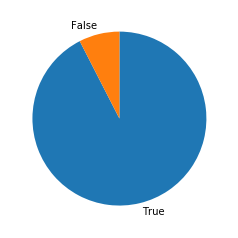

In [72]:
# plot IncomeVerifiable data

IncomeVerifiable = loans['IncomeVerifiable'].value_counts()

plt.pie(IncomeVerifiable, labels = IncomeVerifiable.index, startangle = 90, counterclock = False);

print(str(round(IncomeVerifiable[True]/(IncomeVerifiable[False]+IncomeVerifiable[True])*100, 2)) + '% Verified')

> The data above shows that most of the loans have verified income. To be specific, 92.46% of them are verified.

> Let's move to other features of interest (OpenCreditLines, CurrentCreditLines, CreditScoreRangeLower, CreditScoreRangeUpper, and LoanOriginalAmount). We'll start with the following credit line information: OpenCreditLines, CurrentCreditLines.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!